# Linear Regression

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('../data/Twitter.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701600
1,2013-11-08,45.930000,46.939999,40.689999,41.650002,41.650002,27925300
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113900
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316700
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688300


<AxesSubplot:title={'center':'High and Low stock prices'}, xlabel='High', ylabel='Low'>

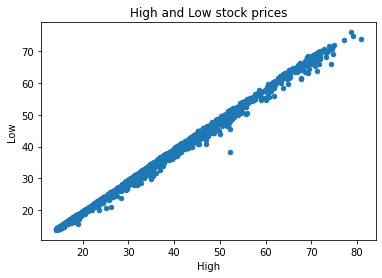

In [22]:
df.plot(kind='scatter',
        x='High',
        y='Low',
        title='High and Low stock prices')

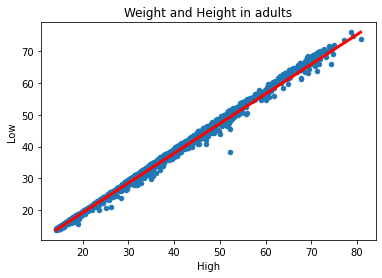

In [23]:
df.plot(kind='scatter',
        x='High',
        y='Low',
        title='High and Low stock prices')

# Here we're plotting the red line with dynamic values, between the lowest value of the graph and high values of the graph for both X and Y axis
plt.plot([df['High'].min(), df['High'].max()], [df['Low'].min(), df['Low'].max()], color='red', linewidth=3)

In [24]:
def line(x, w=0, b=0):
    return x * w + b

In [64]:
x = np.linspace(df['High'].min(), df['High'].max(), df['High'].count())

In [65]:
x

array([14.22    , 14.250973, 14.281946, ..., 80.688054, 80.719027,
       80.75    ])

In [66]:
yhat = line(x, w=0, b=0)

In [67]:
yhat

array([0., 0., 0., ..., 0., 0., 0.])

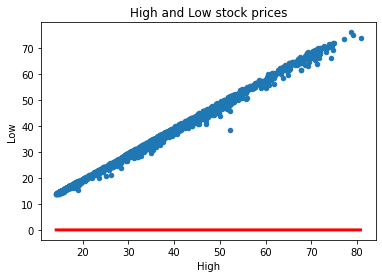

In [68]:
df.plot(kind='scatter',
        x='High',
        y='Low',
        title='High and Low stock prices')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [69]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [81]:
X = df[['High']].values
y_true = df['Low'].values

In [82]:
y_true

array([44.      , 40.689999, 39.400002, ..., 36.580002, 36.200001,
       36.75    ])

In [83]:
y_pred = line(X)

In [84]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [85]:
mean_squared_error(y_true, y_pred.ravel())

1425.5442449068696

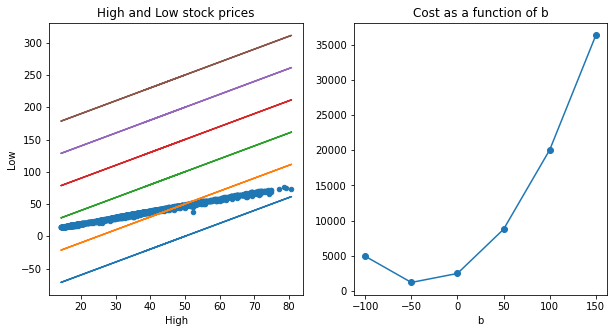

In [86]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='High',
        y='Low',
        title='High and Low stock prices', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

## Linear Regression with Keras

In [87]:
#Import libraries needed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [88]:
# Make a new model for our data set
model = Sequential()

In [89]:
# Add densely-connected NN layer.
model.add(Dense(1, input_shape=(1,)))

In [90]:
#Print summary of the network
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Compile network with Adam algorithme
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [118]:
# Let network run 15 times, 15 times because we dont want to overlearn the machine. This is because the values are really close to eachother
model.fit(X, y_true, epochs=15)

Epoch 1/15
68/68 [==============================] - 0s 419us/step - loss: 62.6349
Epoch 2/15
68/68 [==============================] - 0s 418us/step - loss: 0.6991
Epoch 3/15
68/68 [==============================] - 0s 403us/step - loss: 0.7832
Epoch 4/15
68/68 [==============================] - 0s 418us/step - loss: 0.7717
Epoch 5/15
68/68 [==============================] - 0s 508us/step - loss: 0.7820
Epoch 6/15
68/68 [==============================] - 0s 418us/step - loss: 0.9793
Epoch 7/15
68/68 [==============================] - 0s 416us/step - loss: 0.9527
Epoch 8/15
68/68 [==============================] - 0s 418us/step - loss: 0.8330
Epoch 9/15
68/68 [==============================] - 0s 418us/step - loss: 1.2046
Epoch 10/15
68/68 [==============================] - 0s 418us/step - loss: 1.0400
Epoch 11/15
68/68 [==============================] - 0s 418us/step - loss: 0.9249
Epoch 12/15
68/68 [==============================] - 0s 403us/step - loss: 1.5835
Epoch 13/15
68/68 [=====

In [119]:
# Generate the output of the network
y_pred = model.predict(X)

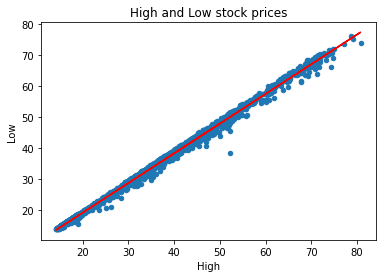

In [120]:
# Visualize the output
df.plot(kind='scatter',
        x='High',
        y='Low',
        title='High and Low stock prices')
plt.plot(X, y_pred, color='red')

In [96]:
# Return the weights of kernel and bias layers
W, B = model.get_weights()

In [97]:
W

array([[0.9947104]], dtype=float32)

In [98]:
B

array([-0.0125118], dtype=float32)